## Homework 3: Classification and Regularization


 This assignment is based on the classification concepts you have covered
in class. The implementation of these is handled by the tools provided by
Python. This assignment tests your concepts in terms of how you approach
classification problems.

This is an individual assignment. No collaboration is allowed, and if 
discovered, will be reported.

<b> Total: 150 marks </b>

## Question 1: Binary Classification (70 marks)

For this part of the assignment, you will be using the Autism dataset
provided to you. You have to classify whether an adult has autism or not
based on the data provided.

You will be using the dataset "autism.csv", which will be provided to you. Go through the README file for this dataset, which will give you a better idea about the data and its attributes.


# If any error, try re-running that particular cell

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to limit precision of floating points while printing
def print(*args):
    __builtins__.print(*("%.2f" % a if isinstance(a, float) else a
                         for a in args))

# Load the data
df = pd.read_csv("autism.csv")

# Take a quick look at the data
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [2]:
# Here's another look at it
df.tail()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
699,700,0,1,0,1,1,0,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,701,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,702,1,0,1,1,1,0,1,1,0,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,703,1,0,0,1,1,0,1,0,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO
703,704,1,0,1,1,1,0,1,1,1,...,f,White-European,no,no,Cyprus,no,8,18 and more,Self,YES


## Part 1a: Short questions (5 marks)

Q. What is the target variable?   
A. The target variable in this dataset is 'Class/ASD'.

Q. Out of the ones you have learnt, what kind of classification will you use?    
A. Since a person can either have autism or not, a binary classification is needed. I will be using logistic regression
    as classifier here.


## Part 1b: Preprocessing (5 marks)
By now, you should have an idea about what you are supposed to do.
Carry out any preprocessing or data cleaning you feel is necessary in this part. 
State why you carried out these steps (if any).


In [3]:
# Function to filter abnormal age values
def filter_age(age):
    if age > 100:
        return np.nan
    else:
        return age

# Replace question marks with NaNs
df.replace({'?':np.nan}, inplace=True)
df = df.dropna()

df['gender'] = df['gender'].apply(str)
df['age'] = df['age'].apply(int)
df['age'] = df['age'].apply(filter_age)


In [4]:
# Preprocess your data
# Drop irrelevant attributes
df = df.drop(['age_desc', 'id', 'used_app_before', 'relation'], axis=1)
# Drop NaNs
df = df.dropna()

In [5]:
# Convert data to a form that can be used by classifier
df['ethnicity'].replace({'others':'Others'}, inplace=True)
df['gender'].replace({'f':0, 'm':1}, inplace=True)
df['jaundice'].replace({'no':0, 'yes':1}, inplace=True)
df['autism'].replace({'no':0, 'yes':1}, inplace=True)

In [6]:
df.tail()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,result,Class/ASD
698,1,1,1,1,1,1,1,1,1,1,27.0,0,Pasifika,0,0,Australia,10,YES
699,0,1,0,1,1,0,1,1,1,1,25.0,0,White-European,0,0,Russia,7,YES
700,1,0,0,0,0,0,0,1,0,1,34.0,1,Hispanic,0,0,Mexico,3,NO
702,1,0,0,1,1,0,1,0,1,1,35.0,1,South Asian,0,0,Pakistan,6,NO
703,1,0,1,1,1,0,1,1,1,1,26.0,0,White-European,0,0,Cyprus,8,YES


## Part 1c: Visualization (5 marks)

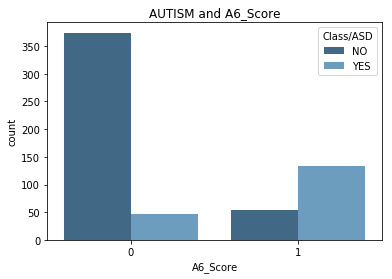

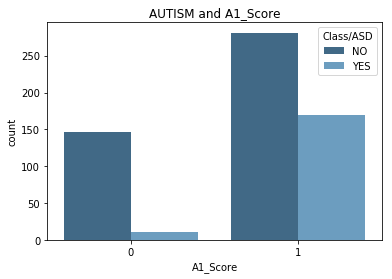

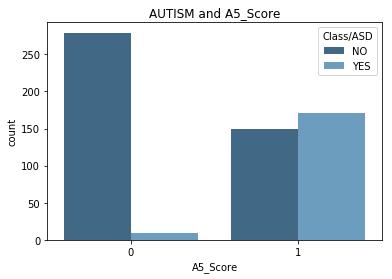

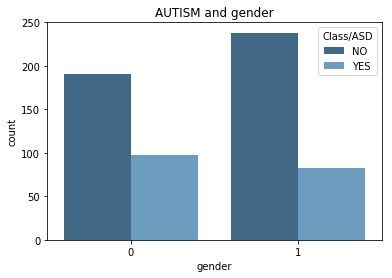

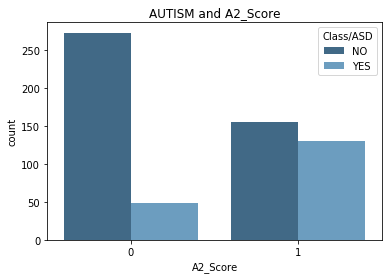

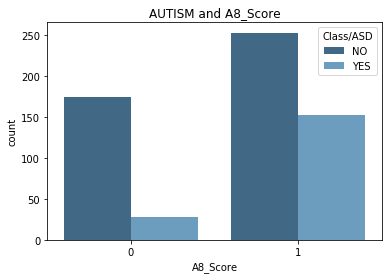

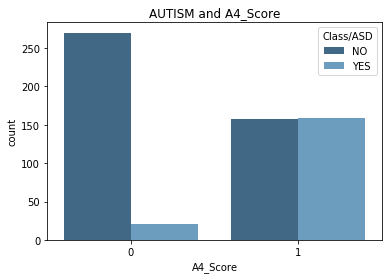

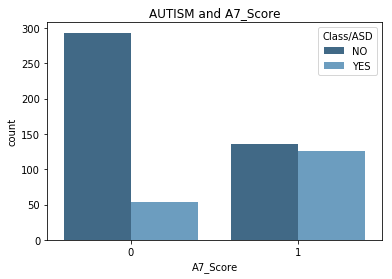

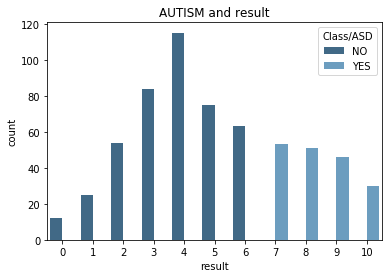

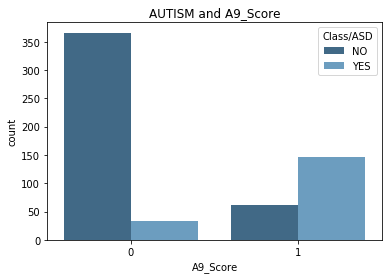

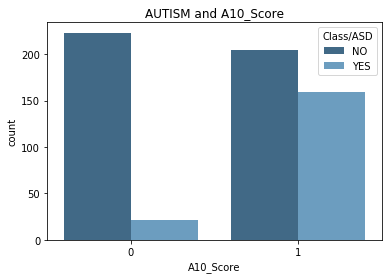

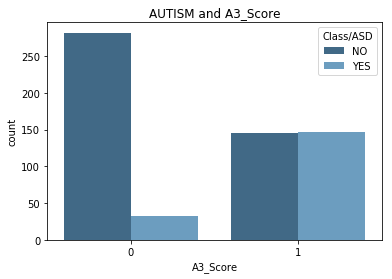

In [7]:
# Visualize the relationships between all the variables to get a glimpse
# of any potential correlations.fig, ax = plt.subplots(figsize=(25,12))

cols = {'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 
       'A9_Score', 'A10_Score', 'gender', 'result'} #ethnicty, age, country 

n = 0
for i in cols:
    plt.figure(n)
    plt.title('AUTISM and ' + i)
    n = n+1
    sns.countplot(x=i, hue='Class/ASD', data=df, palette="Blues_d")

<Figure size 432x288 with 0 Axes>

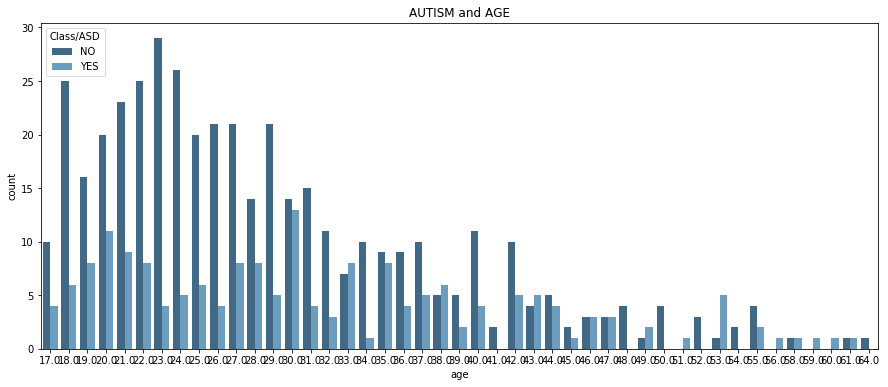

In [8]:
# plt.figure(n=n+1)
# fig,ax = plt.subplots(figsize=(5,18))

plt.figure()
plt.figure(figsize=(15, 6))
plt.title('AUTISM and AGE')
sns.countplot(x='age', hue='Class/ASD', data=df, palette="Blues_d")

<Figure size 432x288 with 0 Axes>

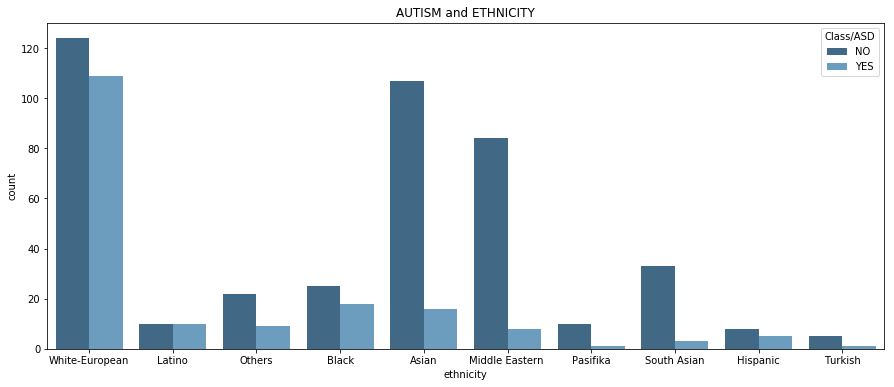

In [9]:
plt.figure()
plt.figure(figsize=(15, 6))
plt.title('AUTISM and ETHNICITY')
sns.countplot(x='ethnicity', hue='Class/ASD', data=df, palette="Blues_d")

## Part 2a: Data splitting (5 marks)

In [10]:
# One-hot encode attributes that may need it
df = pd.get_dummies(df, columns=['country_of_res'], prefix=['country'])
df = pd.get_dummies(df, columns=['ethnicity'], prefix=['ethnicity'])

In [11]:
# Look through the different model selection methods sklearn has to offer.

## Split the data into training and testing. Mention what method you will
## be using and why. 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset = df
dataset['Class/ASD'].replace({'YES':1, 'NO':0}, inplace=True)
train, test = train_test_split(dataset, test_size=0.2)

train_feat = train.drop(['Class/ASD'], axis=1)
train_targ = train['Class/ASD']

test_feat = test.drop(['Class/ASD'], axis=1)
test_targ = test['Class/ASD']

lr = LogisticRegression()

I have used test train split to split the data into training and testing datasets.   
I have divided the original dataset into 80:20 ratio such that training data is   
80 percent of the original dataset and 20 percent is testing dataset.

## Part 2b: Making the Model (10 marks)

In [12]:
## Start with making the model with your training data. For the model 
## training, testing and everything in between, we recommend using 
## scikitlearn.

lr.fit(train_feat, train_targ)
print(lr.score(train_feat, train_targ)*100)

## Now, validate this model using the test data.

print(lr.score(test_feat, test_targ)*100)

97.53
97.54


## Part 2c: Testing the Model (15 marks)

For this part, you need to make a confusion matrix of the model's results and be able to interpret it. 

For information on confusion matrices and how to interpret them, refer to the following __[link](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)__. <br>
<br>


Training confusion matrix:
[[338   6]
 [  6 136]]

Testing confusion matrix:
[[82  1]
 [ 2 37]]


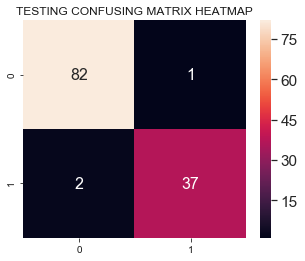

In [13]:
## Use a confusion matrix to test the accuracy of your model.
from sklearn.metrics import confusion_matrix

train_confusion = confusion_matrix(lr.predict(train_feat), train_targ)
print("Training confusion matrix:")
print(train_confusion)

test_confusion = confusion_matrix(lr.predict(test_feat), test_targ)
print("\nTesting confusion matrix:")
print(test_confusion)

## Visualize your evaluation results. 
## Hint: Check Seaborn for something that could help you with this.

df_cm = pd.DataFrame(test_confusion, range(2), range(2))
plt.figure(figsize = (5,4))
plt.title("TESTING CONFUSING MATRIX HEATMAP")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Top Left is are correctly predicted no's and bottom right is correctly predicted yes
Top right is false positive and bottom left is false negative

In [14]:
# Part 2c (contd.) 
## Report the performance of your model. Show multiple metrics. 

tn = test_confusion[0][0]
fp = test_confusion[0][1]
fn = test_confusion[1][0]
tp = test_confusion[1][1]

print("Error:", (1 - lr.score(test_feat, test_targ))*100)
print("True positive rate:", (tp/(fn+tp))*100)
print("False positive rate:", (fp/(tn+fp))*100)
print("True negative rate:", (tn/(tn+fp))*100)
print("Precision:", (tp/(fp+tp))*100)
print("Prevalence:", ((fn+tp)/(tn+fp+fn+tp))*100)

Error: 2.46
True positive rate: 94.87
False positive rate: 1.20
True negative rate: 98.80
Precision: 97.37
Prevalence: 31.97


## Part 3: Regularization

Regularization is essential to reduce the amount of overfitting in your
model. For this part of the assignment, we will be using both the L1
and L2 regularization models.


## L1 Regularization/Lasso Regularization (10 marks)

Recall what you learnt in class about L1 regularization. It aims to 
reduce the model, by eliminating what it estimates to be the least
important features. Due to this, it is relatively unstable and robust.

You are required to use an in-built function to regularize the data
using L1 regularization. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.


Testing score with L1 regularization:  1.00
Error: 0.00
True positive rate: 100.00
False positive rate: 0.00
True negative rate: 100.00
Precision: 100.00
Prevalence: 31.15


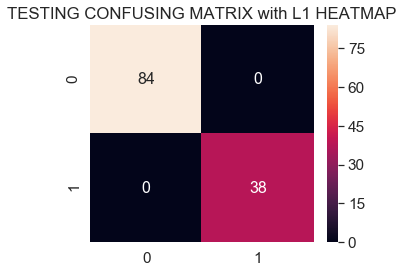

In [15]:
lr_l1 = LogisticRegression(penalty='l1')
lr_l1.fit(train_feat, train_targ)
test_score = lr_l1.score(test_feat, test_targ)
print('Testing score with L1 regularization: ', test_score)

test_confusion = confusion_matrix(lr_l1.predict(test_feat), test_targ)

tn = test_confusion[0][0]
fp = test_confusion[0][1]
fn = test_confusion[1][0]
tp = test_confusion[1][1]

print("Error:", (1 - test_score)*100)
print("True positive rate:", (tp/(fn+tp))*100)
print("False positive rate:", (fp/(tn+fp))*100)
print("True negative rate:", (tn/(tn+fp))*100)
print("Precision:", (tp/(fp+tp))*100)
print("Prevalence:", ((fn+tp)/(tn+fp+fn+tp))*100)

df_cm = pd.DataFrame(test_confusion, range(2), range(2))
plt.figure(figsize = (5,4))
plt.title("TESTING CONFUSING MATRIX with L1 HEATMAP")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Old code for regularization:

In [16]:
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import LinearRegression

# lasso = Lasso(alpha = .001, max_iter=10e5)
# lasso.fit(train_feat, train_targ)
# train_score = lasso.score(train_feat, train_targ)
# test_score = lasso.score(test_feat, test_targ)
# coeff_used = np.sum(lasso.coef_ != 0)

# print("Lasso test score:", test_score*100)
# print("Number of co-efficients used:", coeff_used)

# lr = LinearRegression()
# lr.fit(train_feat, train_targ)
# lr_train_score = lr.score(train_feat, train_targ)
# lr_test_score = lr.score(test_feat, test_targ)

# print("LR test score: ", lr_test_score*100)

# ## Once this is done, report and visualize the performance of this model.

# plt.plot(lasso.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.001$') # alpha here is for transparency
# plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

# plt.xlabel('Coefficient Index',fontsize=16)
# plt.ylabel('Coefficient Magnitude',fontsize=16)
# plt.legend(fontsize=13,loc=1)
# plt.tight_layout()
# plt.show()

## L2 Regularization/Ridge Regularization (10 marks)

To understand Ridge Regularization, we need to refer to what happens 
during gradient descent, during model coefficient training.
Our initial weights are updated according to a gradient update rule,
using a learning rate and a gradient. Ridge regression adds a penalty
to this update. Consequently, this shrinks the size of our weights.

L2 is more stable and less robust than L1. It also does not encourage
sparsity, as unlike L1, weights are never assigned to be 0. Hence, even 
the least important features are considered (albeit to a smaller degree).

For this part, you are required to follow the exact same steps as the
previous one. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.
<br>

Testing score with L2 regularization:  97.54
Error: 2.46
True positive rate: 94.87
False positive rate: 1.20
True negative rate: 98.80
Precision: 97.37
Prevalence: 31.97


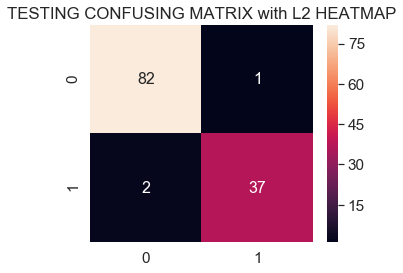

In [17]:
lr_l2 = LogisticRegression(penalty='l2')
lr_l2.fit(train_feat, train_targ)
test_score = lr_l2.score(test_feat, test_targ)
print('Testing score with L2 regularization: ', test_score*100)

test_confusion = confusion_matrix(lr_l2.predict(test_feat), test_targ)

tn = test_confusion[0][0]
fp = test_confusion[0][1]
fn = test_confusion[1][0]
tp = test_confusion[1][1]

print("Error:", (1 - test_score)*100)
print("True positive rate:", (tp/(fn+tp))*100)
print("False positive rate:", (fp/(tn+fp))*100)
print("True negative rate:", (tn/(tn+fp))*100)
print("Precision:", (tp/(fp+tp))*100)
print("Prevalence:", ((fn+tp)/(tn+fp+fn+tp))*100)

df_cm = pd.DataFrame(test_confusion, range(2), range(2))
plt.figure(figsize = (5,4))
plt.title("TESTING CONFUSING MATRIX with L2 HEATMAP")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Old code for regularization

In [18]:
# from sklearn.linear_model import Ridge 

# rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# # restricted and in this case linear and ridge regression resembles
# rr.fit(train_feat, train_targ)

# rr1 = Ridge(alpha=1) #  comparison with alpha value
# rr1.fit(train_feat, train_targ)

# Ridge_train_score = rr.score(train_feat, train_targ)
# Ridge_test_score = rr.score(test_feat, test_targ)

# Ridge_train_score1 = rr1.score(train_feat, train_targ)
# Ridge_test_score1 = rr1.score(test_feat, test_targ)

# print("Ridge regression test score low alpha:", Ridge_test_score*100)
# print("Ridge regression test score high alpha:", Ridge_test_score1*100)

# ## Report and visualize the performance of this regularized model.

# plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

# plt.plot(rr1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency

# plt.xlabel('Coefficient Index',fontsize=16)
# plt.ylabel('Coefficient Magnitude',fontsize=16)
# plt.legend(fontsize=13, loc=4)
# plt.show()

## Questions (5 marks)

Q. Comment on the performance of the regularized models L1 and L2 compared 
to one another, as well as to the non-regularized model in Part 2. <br>
A. L1 regularization increases the accuracy of the model to an extent such that it predicts all of the test data correctly, resulting in accuracy of 100% (at least this was the case whenever I tried). On the other hand, logistic regression runs L2 regularization by default, so non-regularized and L2 regularization gives the same accuracy of ~90% on the test data.


Q. What do you think are the causes of these results? <br>
A. Non-regularized model overfits the data, hence the accuracy of ~90% is achieved. This is due to too many featrues. L1 deals with it by not using all the features.



*End of Question 1*

## Question 2: Multiclass Classification (80 marks)

This question is in the same vein as the last. You are provided with the 
Glass dataset. You have to infer the type of glass given its chemical
composition.

For this question, you are working with "Glass.csv" which has been attached alongside this assignment. Check out the README for this file to get a better understanding of its attributes.

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("Glass.csv")

# Have a quick look at the data.
df.head()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Part 1a: Short questions (5 marks)
    
Q. Identify the target variable and its range of values.   
A. type is the target variable here. Its range is from 1 to 7 (both included).

Q. Of the classifiers discussed in class, which one will you use for this
dataset, and why?   
A. A multinomial classifier will be used since the number of classes is more than 2.
    I will be using logistic regression with one-vs-rest approach in this because
    because it supports multiple classes and is easy to implement.

Q. Does the data need any preprocessing?    
A. I wont be doing any preprocessing on the data since there are are no missing values
    in the dataset and all the columns are in processable data type.

## Part 1b: Visualization (5 marks)

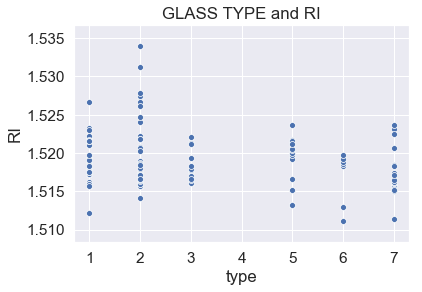

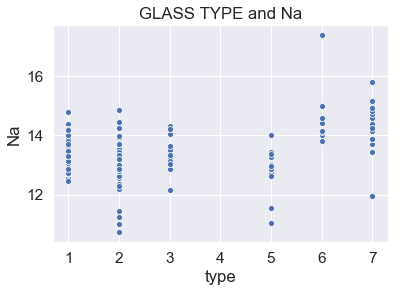

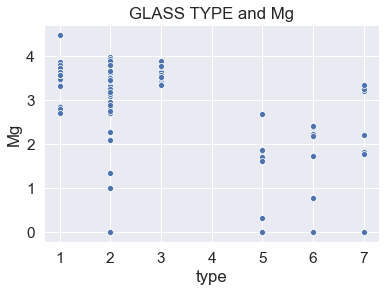

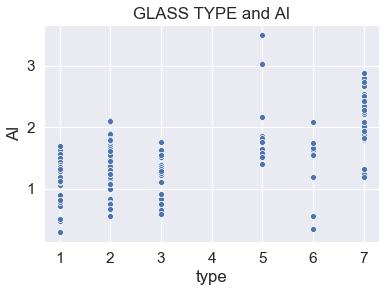

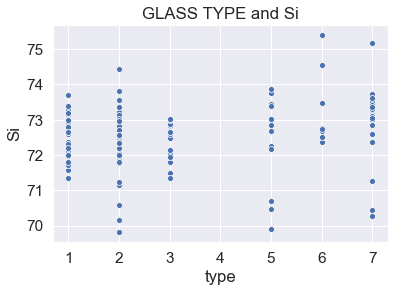

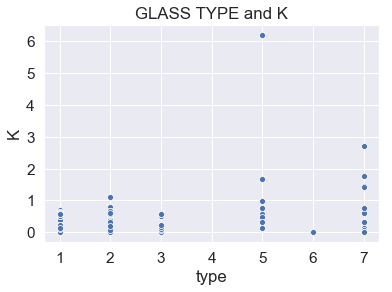

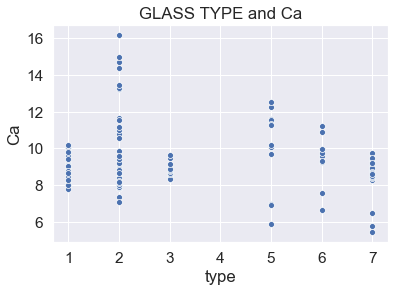

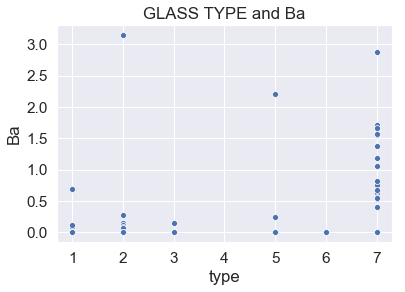

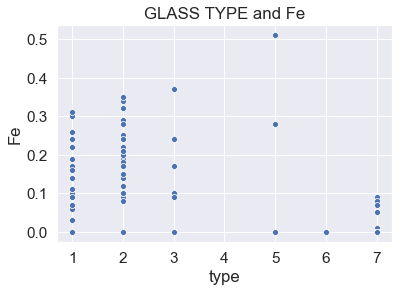

In [20]:
## Visualize all possible relationships between variables within the data.

cols = list(df.columns.values)
cols.remove('ID')
cols.remove('type')
n = 0
for i in cols:
    plt.figure(n)
    plt.title('GLASS TYPE and ' + i)
    n = n+1
    sns.scatterplot(x='type', y=i, data=df)

## Part 2a: Data splitting (5 marks)

In [21]:
## Split the data into train-test groups, using the method of your choice.

from sklearn.model_selection import train_test_split

dataset = df
dataset = dataset.drop(['ID'], axis=1)
train, test = train_test_split(dataset, test_size=0.2)
train_feat = train.drop(['type'], axis=1)
test_feat = test.drop(['type'], axis=1)
train_targ = train['type']
test_targ = test['type']

## Part 2b: Making the Model (10 marks)

For this part you have two options for classifiers: Softmax Classifier 
or One-vs-Rest classification. Use one of these to model your data.

You are required to research this on your own. 

For guidance on Softmax, you can refer to __[this](https://towardsdatascience.com/the-softmax-function-neural-net-outputs-as-probabilities-and-ensemble-classifiers-9bd94d75932)__.

To learn more about One-vs-Rest classifier, check __[this](https://www.coursera.org/lecture/machine-learning/multiclass-classification-one-vs-all-68Pol)__ out. 


In [22]:
## Make your model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr')
lr.fit(train_feat, train_targ)
print("Training score:", lr.score(train_feat, train_targ)*100)

## Validate model with test data

print("Testing score:", lr.score(test_feat, test_targ)*100)

Training score: 61.99
Testing score: 62.79


## Part 2c: Testing the Model (15 marks)

In [23]:
## Show the accuracy of your model. Use the appropriate performance metrics.

from sklearn.metrics import confusion_matrix

print('Training confusion matrix:')
train_confusion = confusion_matrix(lr.predict(train_feat), train_targ)
print(train_confusion)

print('\nTesting confusion matrix:')
test_confusion = confusion_matrix(lr.predict(test_feat), test_targ)
print(test_confusion)


Training confusion matrix:
[[54 25 13  0  0  1]
 [ 7 32  2  7  4  1]
 [ 0  0  0  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  1  0]
 [ 0  1  0  1  2 18]]

Testing confusion matrix:
[[8 8 0 0 0 0]
 [1 9 2 2 0 0]
 [0 0 0 0 0 0]
 [0 0 0 2 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 2 8]]


## Part 2d: Visualize the model's results (5 marks)

Text(0.5,1,'TEST HEATMAP')

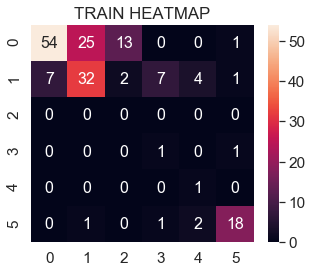

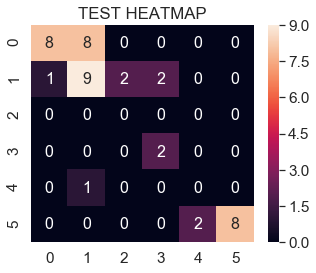

In [24]:
# Write code here

dim1 = int((train_confusion.size)**(1/2))
df_cm = pd.DataFrame(train_confusion, range(dim1), range(dim1))
plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title('TRAIN HEATMAP')

dim = int((test_confusion.size)**(1/2))
df_cm = pd.DataFrame(test_confusion, range(dim), range(dim))
plt.figure(figsize = (5,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
plt.title('TEST HEATMAP')

The values on the diagonal show the correctly predicted values. More the values on the diagonal, better our model is.

## Part 3: Regularization

As with the previous parts, you are required to regularize the multiclass 
model.

## L1 Regularization/Lasso Regularization (15 marks)

You are required to use an in-built function to regularize the data
using L1 regularization. 

Be sure to play around with the parameters to get the model with the
best results. Show your process.

Testing score with L1 regularization:  65.12
Error: 34.88


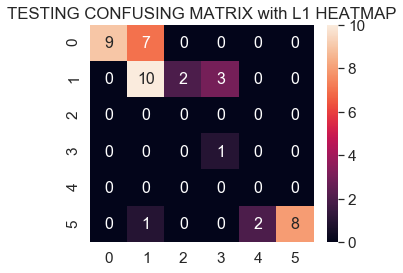

In [25]:
lr_l1 = LogisticRegression(penalty='l1')
lr_l1.fit(train_feat, train_targ)
test_score = lr_l1.score(test_feat, test_targ)
print('Testing score with L1 regularization: ', test_score*100)

test_confusion = confusion_matrix(lr_l1.predict(test_feat), test_targ)

dim = len(test_confusion)

print("Error:", (1 - test_score)*100)

df_cm = pd.DataFrame(test_confusion, range(dim), range(dim))
plt.figure(figsize = (5,4))
plt.title("TESTING CONFUSING MATRIX with L1 HEATMAP")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Old code for regularization

In [26]:
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import LinearRegression
# # Write code here

# lasso001 = Lasso(alpha = 0.01, max_iter=10e5)
# lasso001.fit(train_feat, train_targ)
# train_score = lasso001.score(train_feat, train_targ)
# test_score = lasso001.score(test_feat, test_targ)
# coeff_used = np.sum(lasso001.coef_ != 0)

# lasso0001 = Lasso(alpha=0.0001, max_iter=10e5)
# lasso0001.fit(train_feat, train_targ)

# train_score0001 = lasso0001.score(train_feat, train_targ)
# test_score0001 = lasso0001.score(test_feat, test_targ)
# coeff_used0001 = np.sum(lasso0001.coef_ != 0)

# lr = LinearRegression()
# lr.fit(train_feat, train_targ)
# lr_train_score = lr.score(train_feat, train_targ)
# lr_test_score = lr.score(test_feat, test_targ)

# ## Once this is done, report and visualize the performance of this model.

# # print("Training score:", train_score*100) 
# print("Test score alpha=0.001:", test_score*100)
# print("Number of features used alpha=0.001:", coeff_used)

# # print("Training score for alpha=0.0001:", train_score00001*100)
# print("Test score for alpha=0.0001:", test_score0001*100)
# print("Number of features used: for alpha=0.0001:", coeff_used0001)

# plt.subplot()

# plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
# plt.plot(lasso0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency

# plt.xlabel('Coefficient Index',fontsize=16)
# plt.ylabel('Coefficient Magnitude',fontsize=16)
# plt.legend(fontsize=13,loc=10)
# plt.tight_layout()
# plt.show()

## L2 Regularization/Ridge Regularization (15 marks)

For this part, you are required to follow the exact same steps as the
previous one.

Be sure to play around with the parameters to get the model with the
best results. Show your process.


Testing score with L2 regularization:  62.79
Error: 37.21


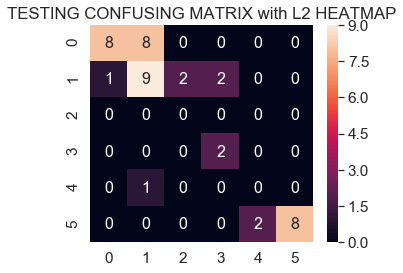

In [27]:
lr_l2 = LogisticRegression(penalty='l2')
lr_l2.fit(train_feat, train_targ)
test_score = lr_l2.score(test_feat, test_targ)
print('Testing score with L2 regularization: ', test_score*100)

test_confusion = confusion_matrix(lr_l2.predict(test_feat), test_targ)

dim = len(test_confusion)

print("Error:", (1 - test_score)*100)

df_cm = pd.DataFrame(test_confusion, range(dim), range(dim))
plt.figure(figsize = (5,4))
plt.title("TESTING CONFUSING MATRIX with L2 HEATMAP")
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Old code for regularization

In [28]:
# from sklearn.linear_model import Ridge 
# # Write code here

# rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# # restricted and in this case linear and ridge regression resembles
# rr.fit(train_feat, train_targ)

# rr1 = Ridge(alpha=100) #  comparison with alpha value
# rr1.fit(train_feat, train_targ)

# Ridge_train_score = rr.score(train_feat, train_targ)
# Ridge_test_score = rr.score(test_feat, test_targ)

# Ridge_train_score1 = rr1.score(train_feat, train_targ)
# Ridge_test_score1 = rr1.score(test_feat, test_targ)

# ## Report and visualize the performance of this regularized model.

# print("Ridge regression train score low alpha:", Ridge_train_score*100)
# print("Ridge regression test score low alpha:", Ridge_test_score*100)
# print("Ridge regression train score high alpha:", Ridge_train_score1*100)
# print("Ridge regression test score high alpha:", Ridge_test_score1*100)

# ## Report and visualize the performance of this regularized model.

# plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers

# plt.plot(rr1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency

# plt.xlabel('Coefficient Index',fontsize=16)
# plt.ylabel('Coefficient Magnitude',fontsize=16)
# plt.legend(fontsize=13,loc=1)
# plt.show()

## Questions (5 marks)

Q. Comment on the performance of the regularized models L1 and L2 compared 
to one another, as well as to the non-regularized model in Part 2.    
A. Here non-regularized model gives a score of ~60%, where as L1 regularization gives around the same score as well (score of L1 may be more by a few percents). L2 is the default regularization so it's same as the non regularized model.

Q.What do you think are the causes of these results?    
A. Since score of non regularized, L1 and L2 are almost similar, one can say that there almost no benefit of using one regularization over another.

Q. Comment on the results of regularization on the Autism dataset versus
the Glass dataset. Are the results similar? Are they different? What 
affects these results?    
A. Results are very dissimilar. In autism dataset has very high accuracy and L1 always make the score 100%. The glass dataset has low accuracy. Regularizations on this model do not help much in increasing the accuracy of the model.


*End of Question 2*